In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/soojeonge22/TextClassifications/master/data/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('Total samples :',len(data))

Total samples : 5572


In [4]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
print('Check Null :',data.isnull().values.any())

Check Null : False


In [8]:
print('Unique value in v2 :',data['v2'].nunique())

Unique value in v2 : 5169


In [9]:
# Remove duplicates in v2
data.drop_duplicates(subset=['v2'], inplace=True)
print('Total Samples :',len(data))

Total Samples : 5169


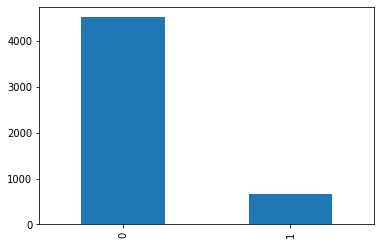

In [10]:
data['v1'].value_counts().plot(kind='bar')

In [11]:
print('The number of regular mails and spam mails')
print(data.groupby('v1').size().reset_index(name='count'))

The number of regular mails and spam mails
   v1  count
0   0   4516
1   1    653


In [12]:
print(f'proportion of regular mails = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'proportion of spam mails = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

proportion of regular mails = 87.367%
proportion of spam mails = 12.633%


In [13]:
X_data = data['v2']
y_data = data['v1']
print('the number of mail bodies: {}'.format(len(X_data)))
print('the number of labels: {}'.format(len(y_data)))

the number of mail bodies: 5169
the number of labels: 5169


In [14]:
# divide data into train and test with proper distribution using sklearn lib
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [15]:
print('--------distribution in training data-----------')
print(f'regular mails = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'spam mails = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------distribution in training data-----------
regular mails = 87.376%
spam mails = 12.624%


In [16]:
print('--------distribution in test data-----------')
print(f'regular mails = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'spam mails = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------distribution in test data-----------
regular mails = 87.331%
spam mails = 12.669%


In [17]:
# tokenization and encoding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [27]:
word_to_index = tokenizer.word_index
#print(word_to_index)

In [19]:
threshold = 2
total_cnt = len(word_to_index) # total words
rare_cnt = 0 # counting words that is less frequent than threshold 
total_freq = 0 #total frequency of words in train data  
rare_freq = 0 # total frequency of words that are less frequent than threshold 

# word = key, its freq = value
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # if the frequency of the word is less than threshold
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('the # of rere words whose freq is less than %s: %s'%(threshold - 1, rare_cnt))
print("proportion of rare words in vocabuary:", (rare_cnt / total_cnt)*100)
print("proportaion of freq of rare words in total freq :", (rare_freq / total_freq)*100)

the # of rere words whose freq is less than 1: 4337
proportion of rare words in vocabuary: 55.45326684567191
proportaion of freq of rare words in total freq : 6.65745644331875


In [20]:
vocab_size = len(word_to_index) + 1
print('vocab size: {}'.format((vocab_size)))

vocab size: 7822


length of the longest mail : 189
average length of mails : 15.754534


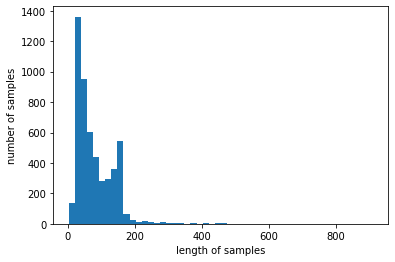

In [21]:
print('length of the longest mail : %d' % max(len(sample) for sample in X_train_encoded))
print('average length of mails : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("the shape of train data:", X_train_padded.shape)

the shape of train data: (4135, 189)


In [23]:
# training using RNN (many to one)
# binary classification -> activation f : sigmoid, loss f : crossentropy
# batch 64, 5 fold validations 

from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 13s 169ms/step - loss: 0.4168 - acc: 0.8619 - val_loss: 0.3298 - val_acc: 0.8779
Epoch 2/4
52/52 [==============================] - 9s 167ms/step - loss: 0.1900 - acc: 0.9453 - val_loss: 0.1346 - val_acc: 0.9625
Epoch 3/4
52/52 [==============================] - 9s 164ms/step - loss: 0.0776 - acc: 0.9819 - val_loss: 0.0852 - val_acc: 0.9746
Epoch 4/4
52/52 [==============================] - 9s 168ms/step - loss: 0.0522 - acc: 0.9858 - val_loss: 0.0650 - val_acc: 0.9807


In [25]:
# accuracy for test data 

X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n accuracy for test data: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 1s 15ms/step - loss: 0.0711 - acc: 0.9816

 accuracy for test data: 0.9816


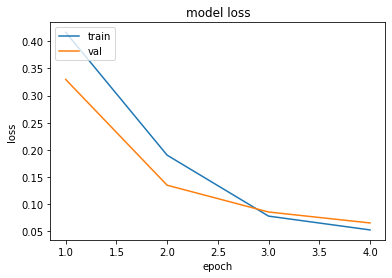

In [26]:
# visualization

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()